In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

# Preparing the data

In [12]:
funding_payments_df = pd.read_csv("funding_payments.csv")
funding_payments_df.drop(columns=["Unnamed: 0"], inplace=True)
funding_payments_df["time"] = pd.to_datetime(funding_payments_df["timestamp"], unit='s')
funding_payments_df["pool_name"] = funding_payments_df["base_token"].replace(tokens_addresses_to_names_dict)
funding_payments_df["day_of_year"] = funding_payments_df["time"].dt.dayofyear

funding_updates_df = pd.read_csv("funding_updates.csv")
funding_updates_df.drop(columns=["Unnamed: 0"], inplace=True)
funding_updates_df["time"] = pd.to_datetime(funding_updates_df["timestamp"], unit='s')
funding_updates_df["pool_name"] = funding_updates_df["base_token"].replace(tokens_addresses_to_names_dict)
funding_updates_df["day_of_year"] = funding_updates_df["time"].dt.dayofyear

# Funding payment over time

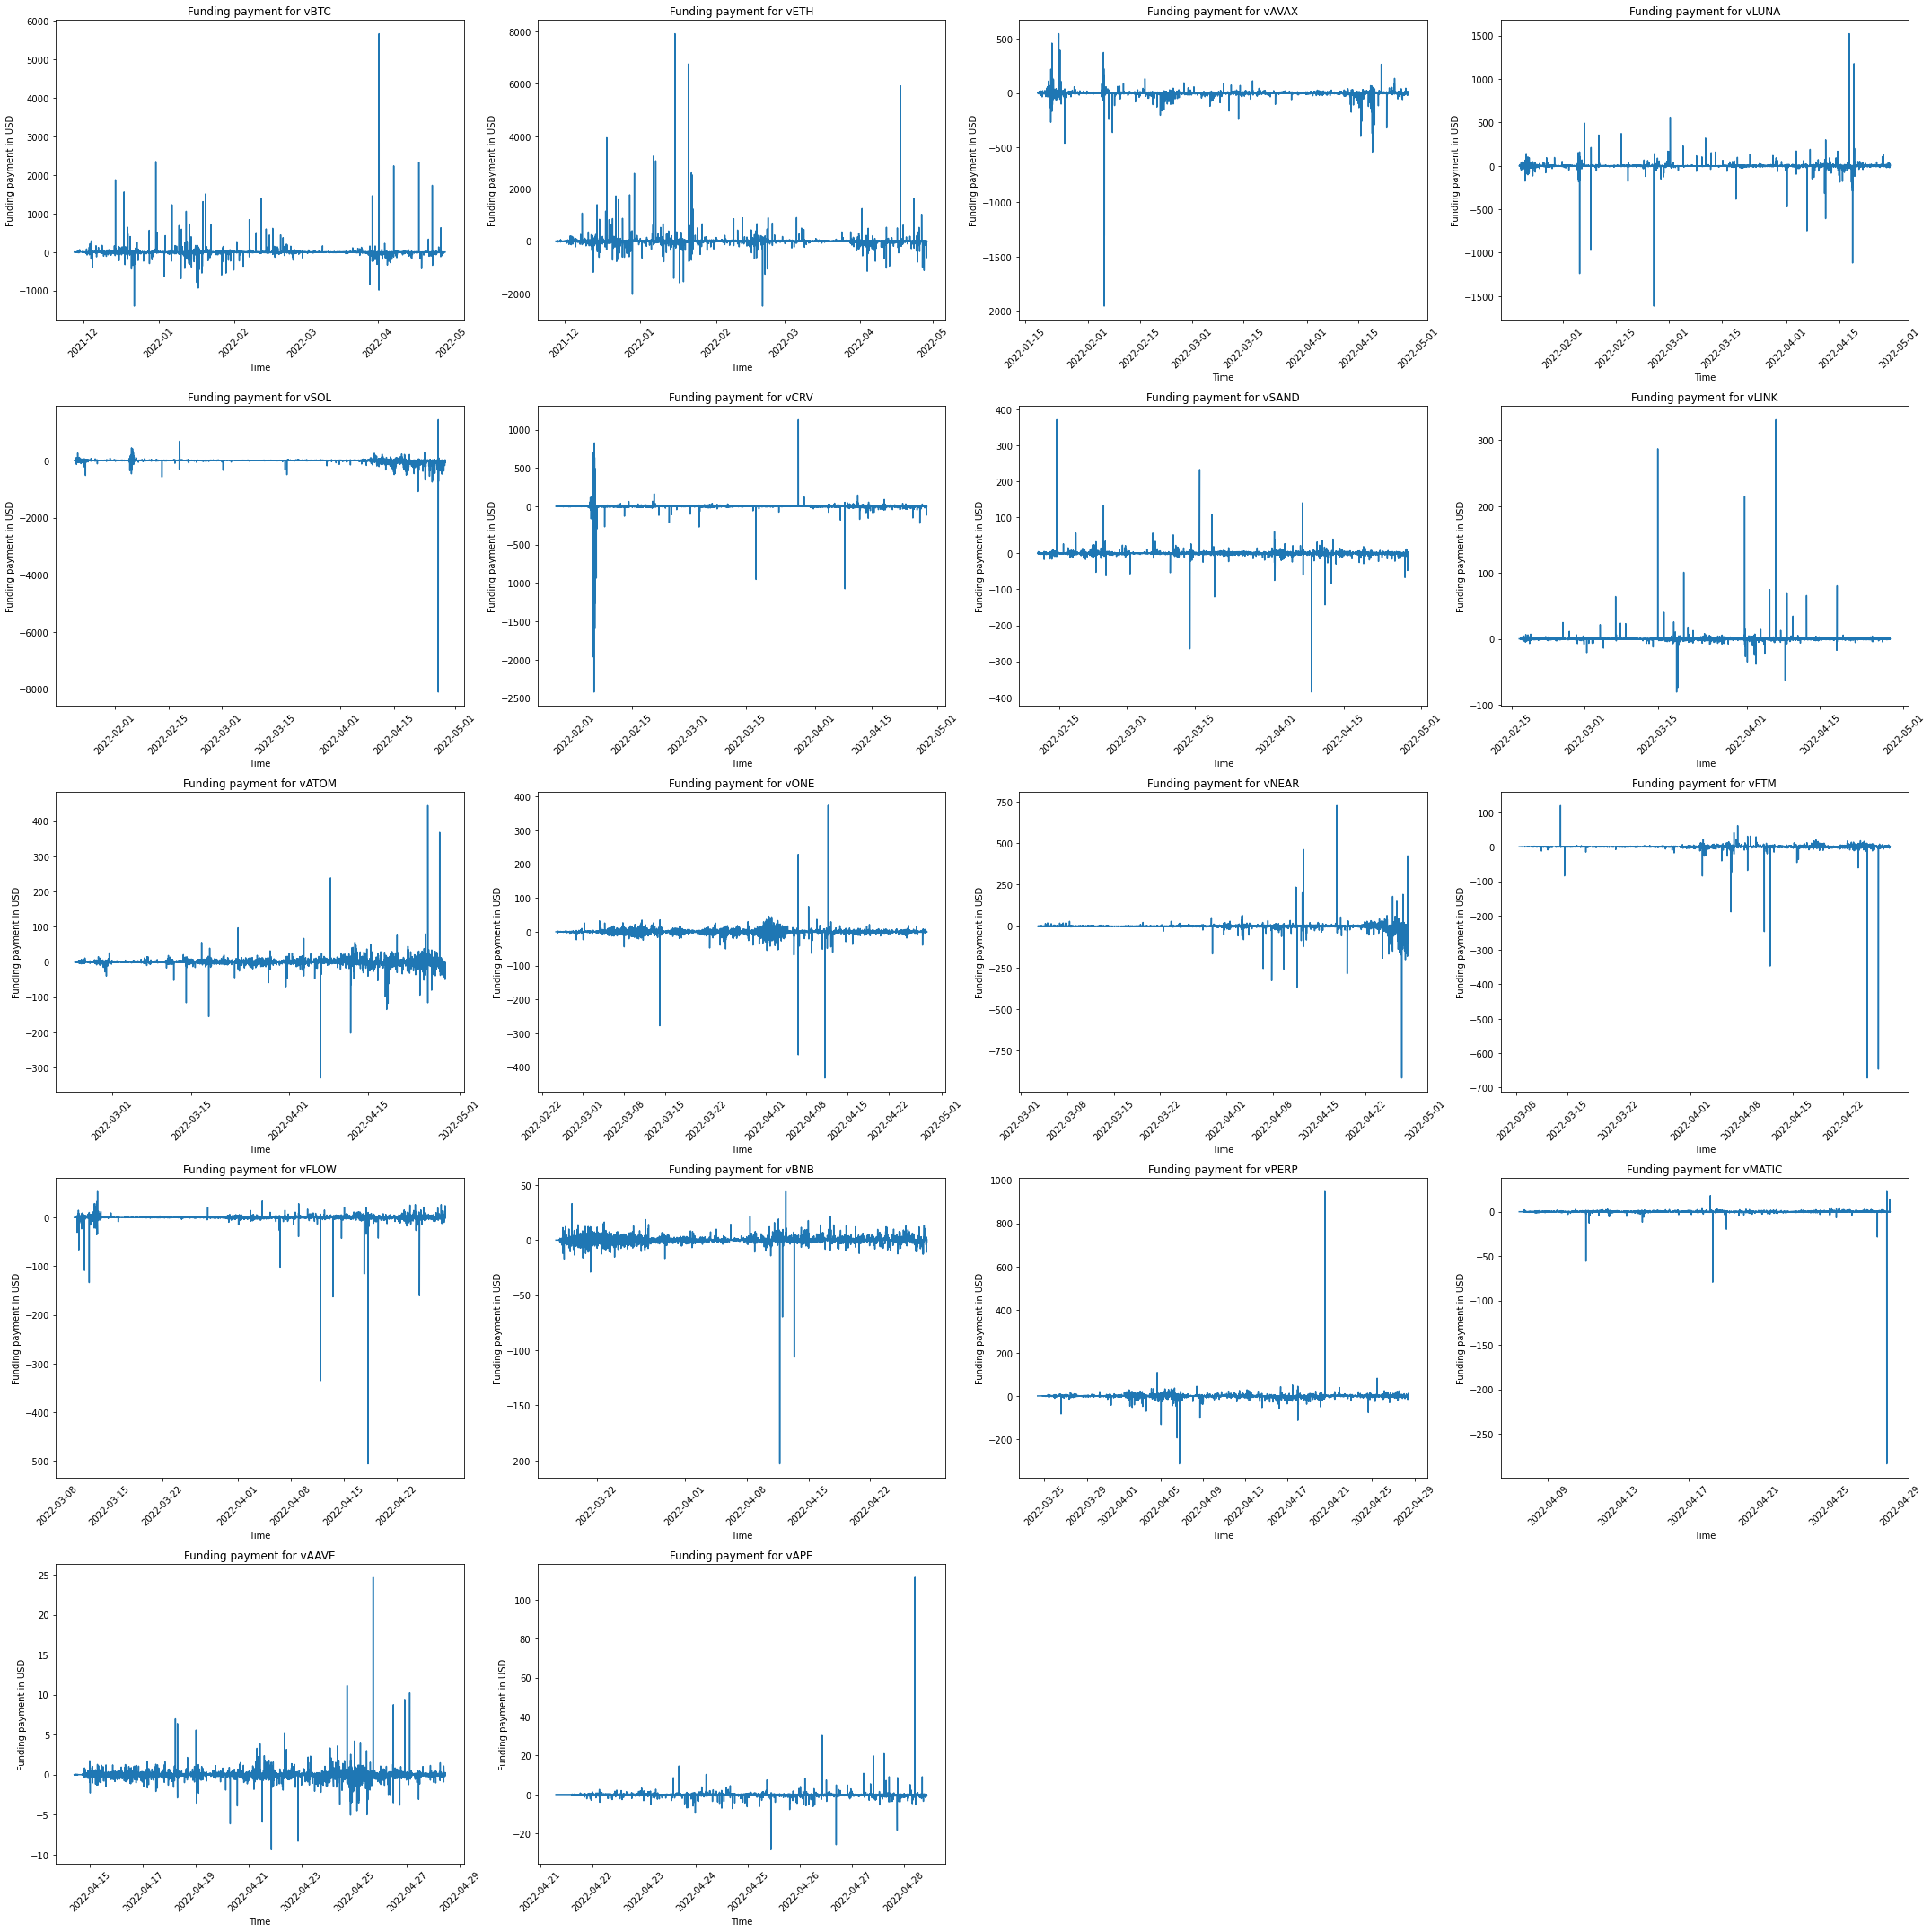

In [13]:
fig = plt.figure(figsize=(30, 30))
index = 1

for pool in funding_payments_df["pool_name"].unique():
    pool_funding_payments_df = funding_payments_df[funding_payments_df["pool_name"] == pool]
    
    ax = fig.add_subplot(5, 4, index)
    ax.plot(pool_funding_payments_df["time"], pool_funding_payments_df["funding_payment"])
    ax.set_xlabel("Time")
    ax.set_ylabel("Funding payment in USD")
    ax.set_title("Funding payment for " + pool)
    plt.xticks(rotation=45)
    index += 1
    
plt.tight_layout()
plt.show()

# Funding payment daily sum over time

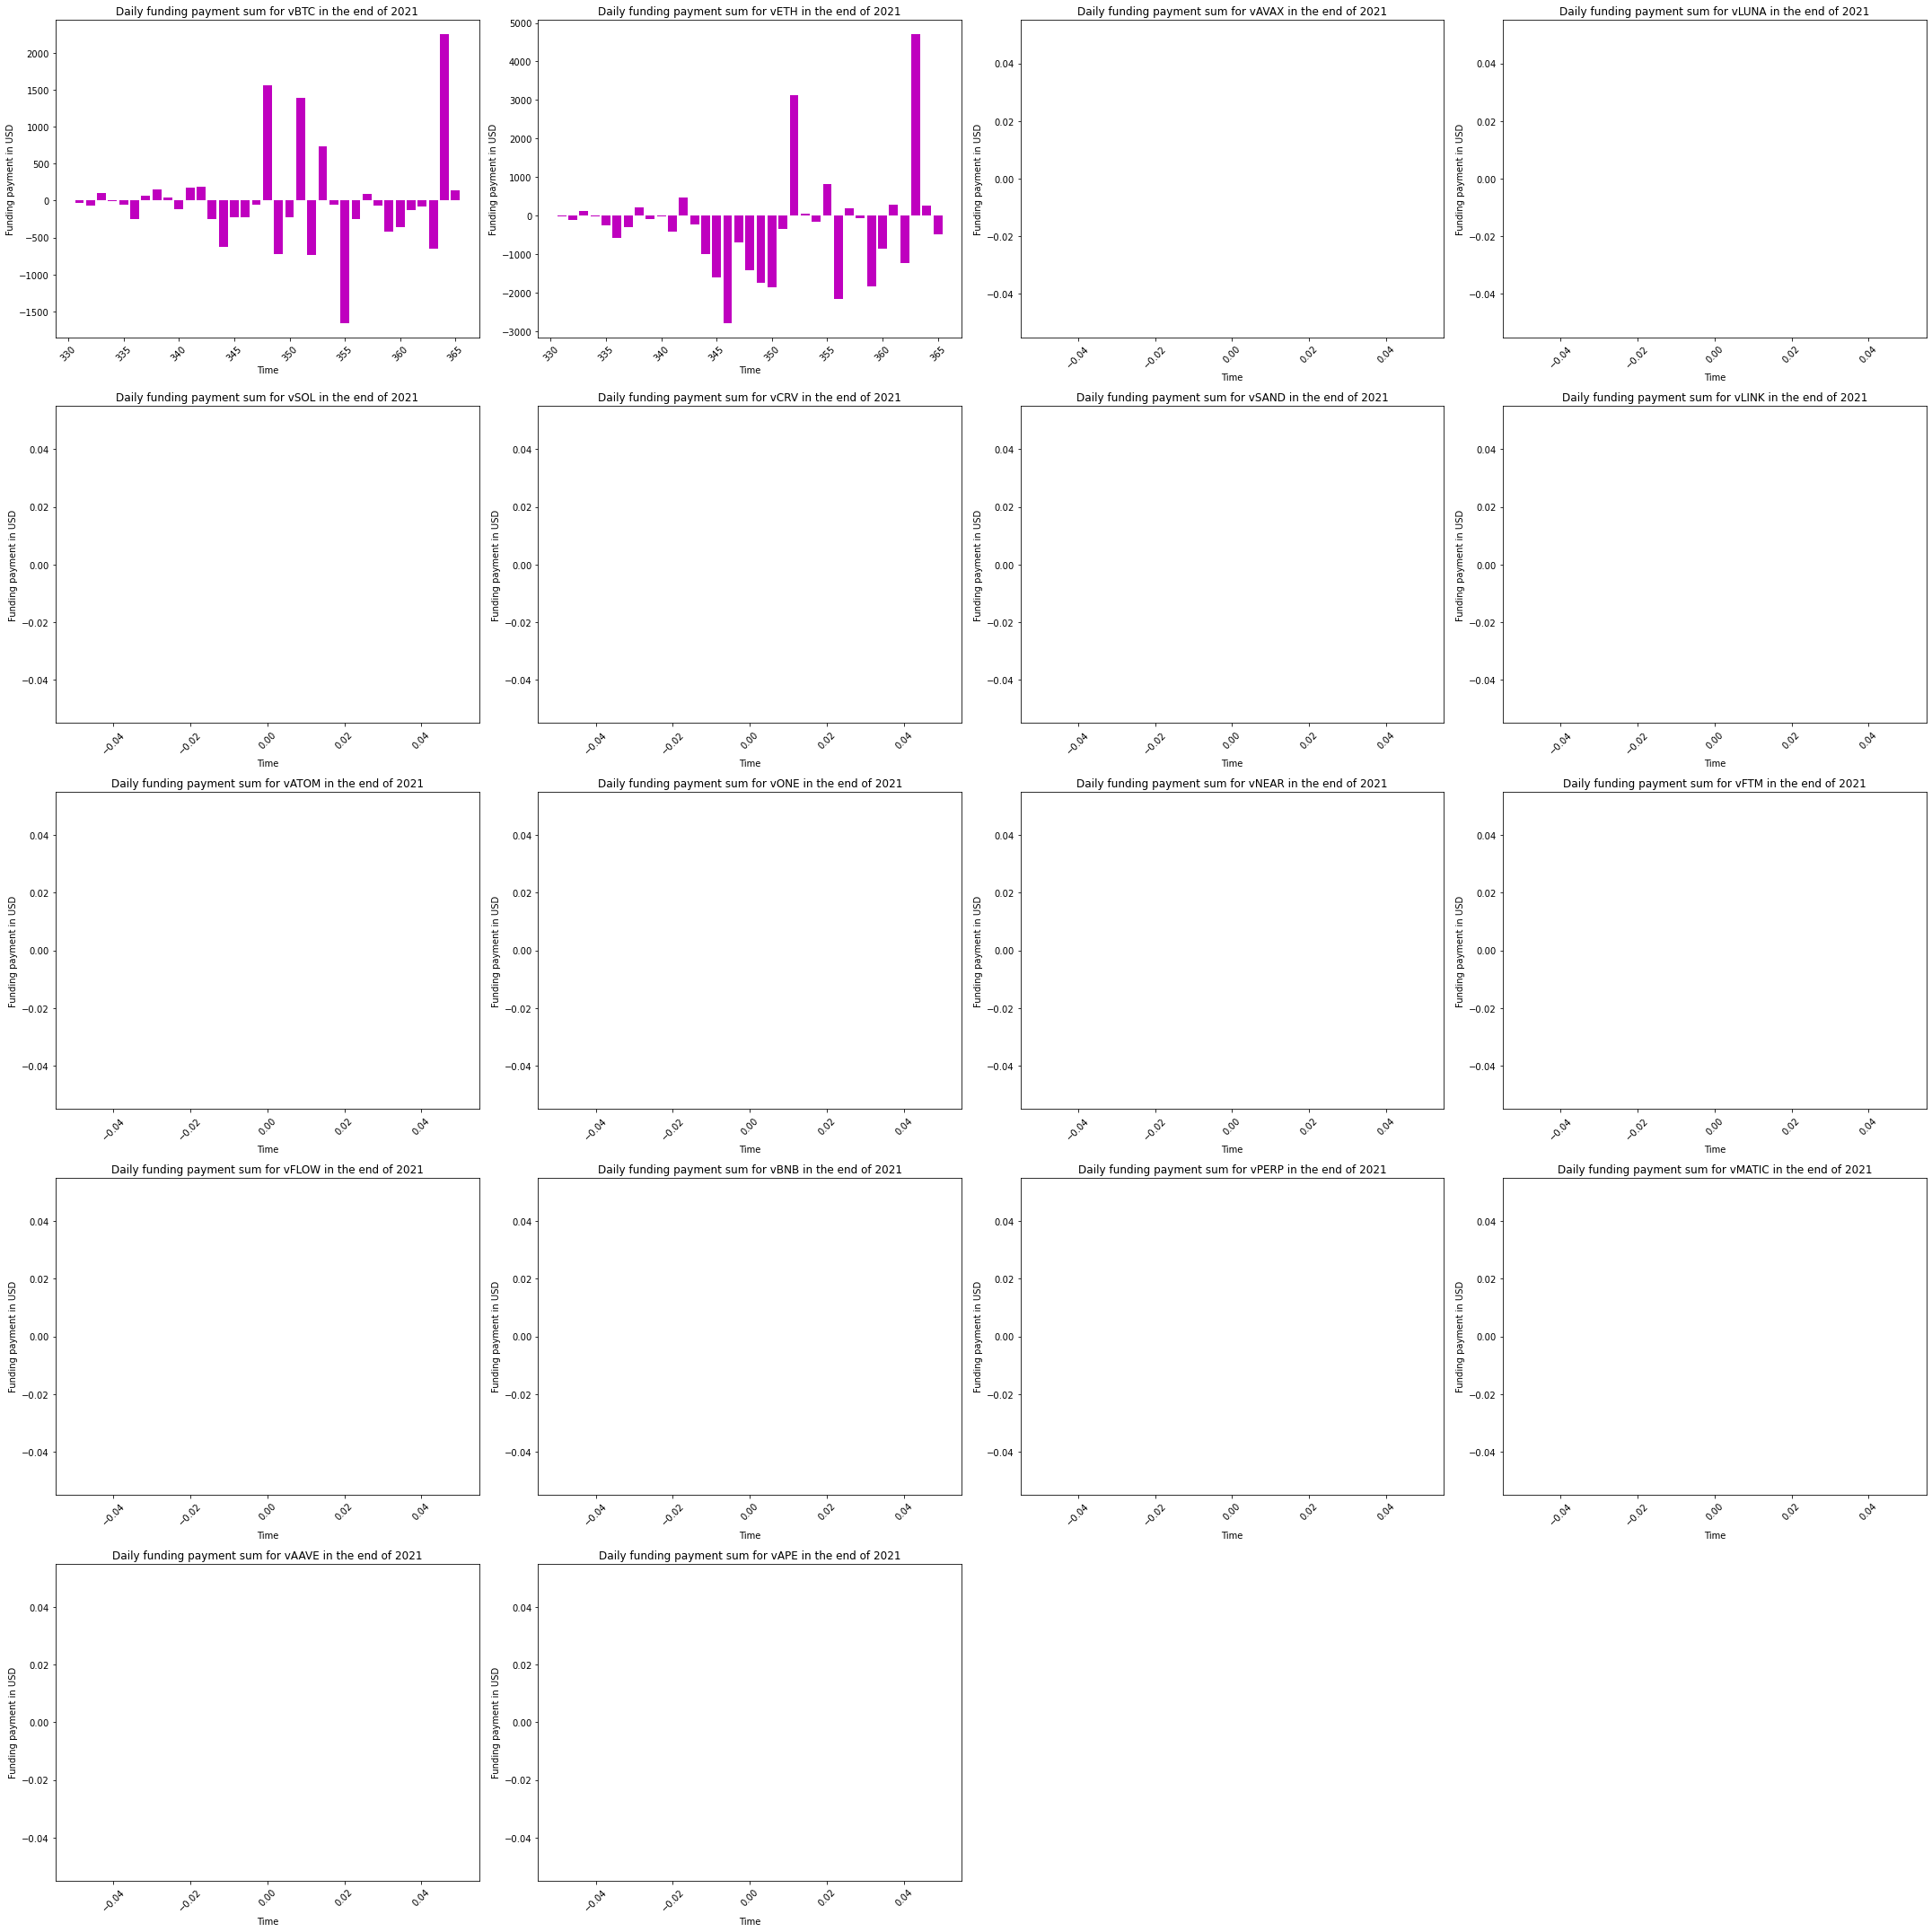

In [19]:
fig = plt.figure(figsize=(30, 30))
index = 1

for pool in funding_payments_df["pool_name"].unique():
    pool_funding_payments_df = funding_payments_df[funding_payments_df["pool_name"] == pool]
    daily_pool_funding_payments_df = pool_funding_payments_df[["day_of_year", "funding_payment"
                                                               ]].groupby("day_of_year").sum()
    
    ax = fig.add_subplot(5, 4, index)
    ax.bar(daily_pool_funding_payments_df[daily_pool_funding_payments_df.index > 300].index, 
            daily_pool_funding_payments_df[daily_pool_funding_payments_df.index > 300]["funding_payment"],
            color='m')
    ax.set_xlabel("Time")
    ax.set_ylabel("Funding payment in USD")
    ax.set_title("Daily funding payment sum for " + pool + " in the end of 2021")
    plt.xticks(rotation=45)
    index += 1
    
plt.tight_layout()
plt.show()

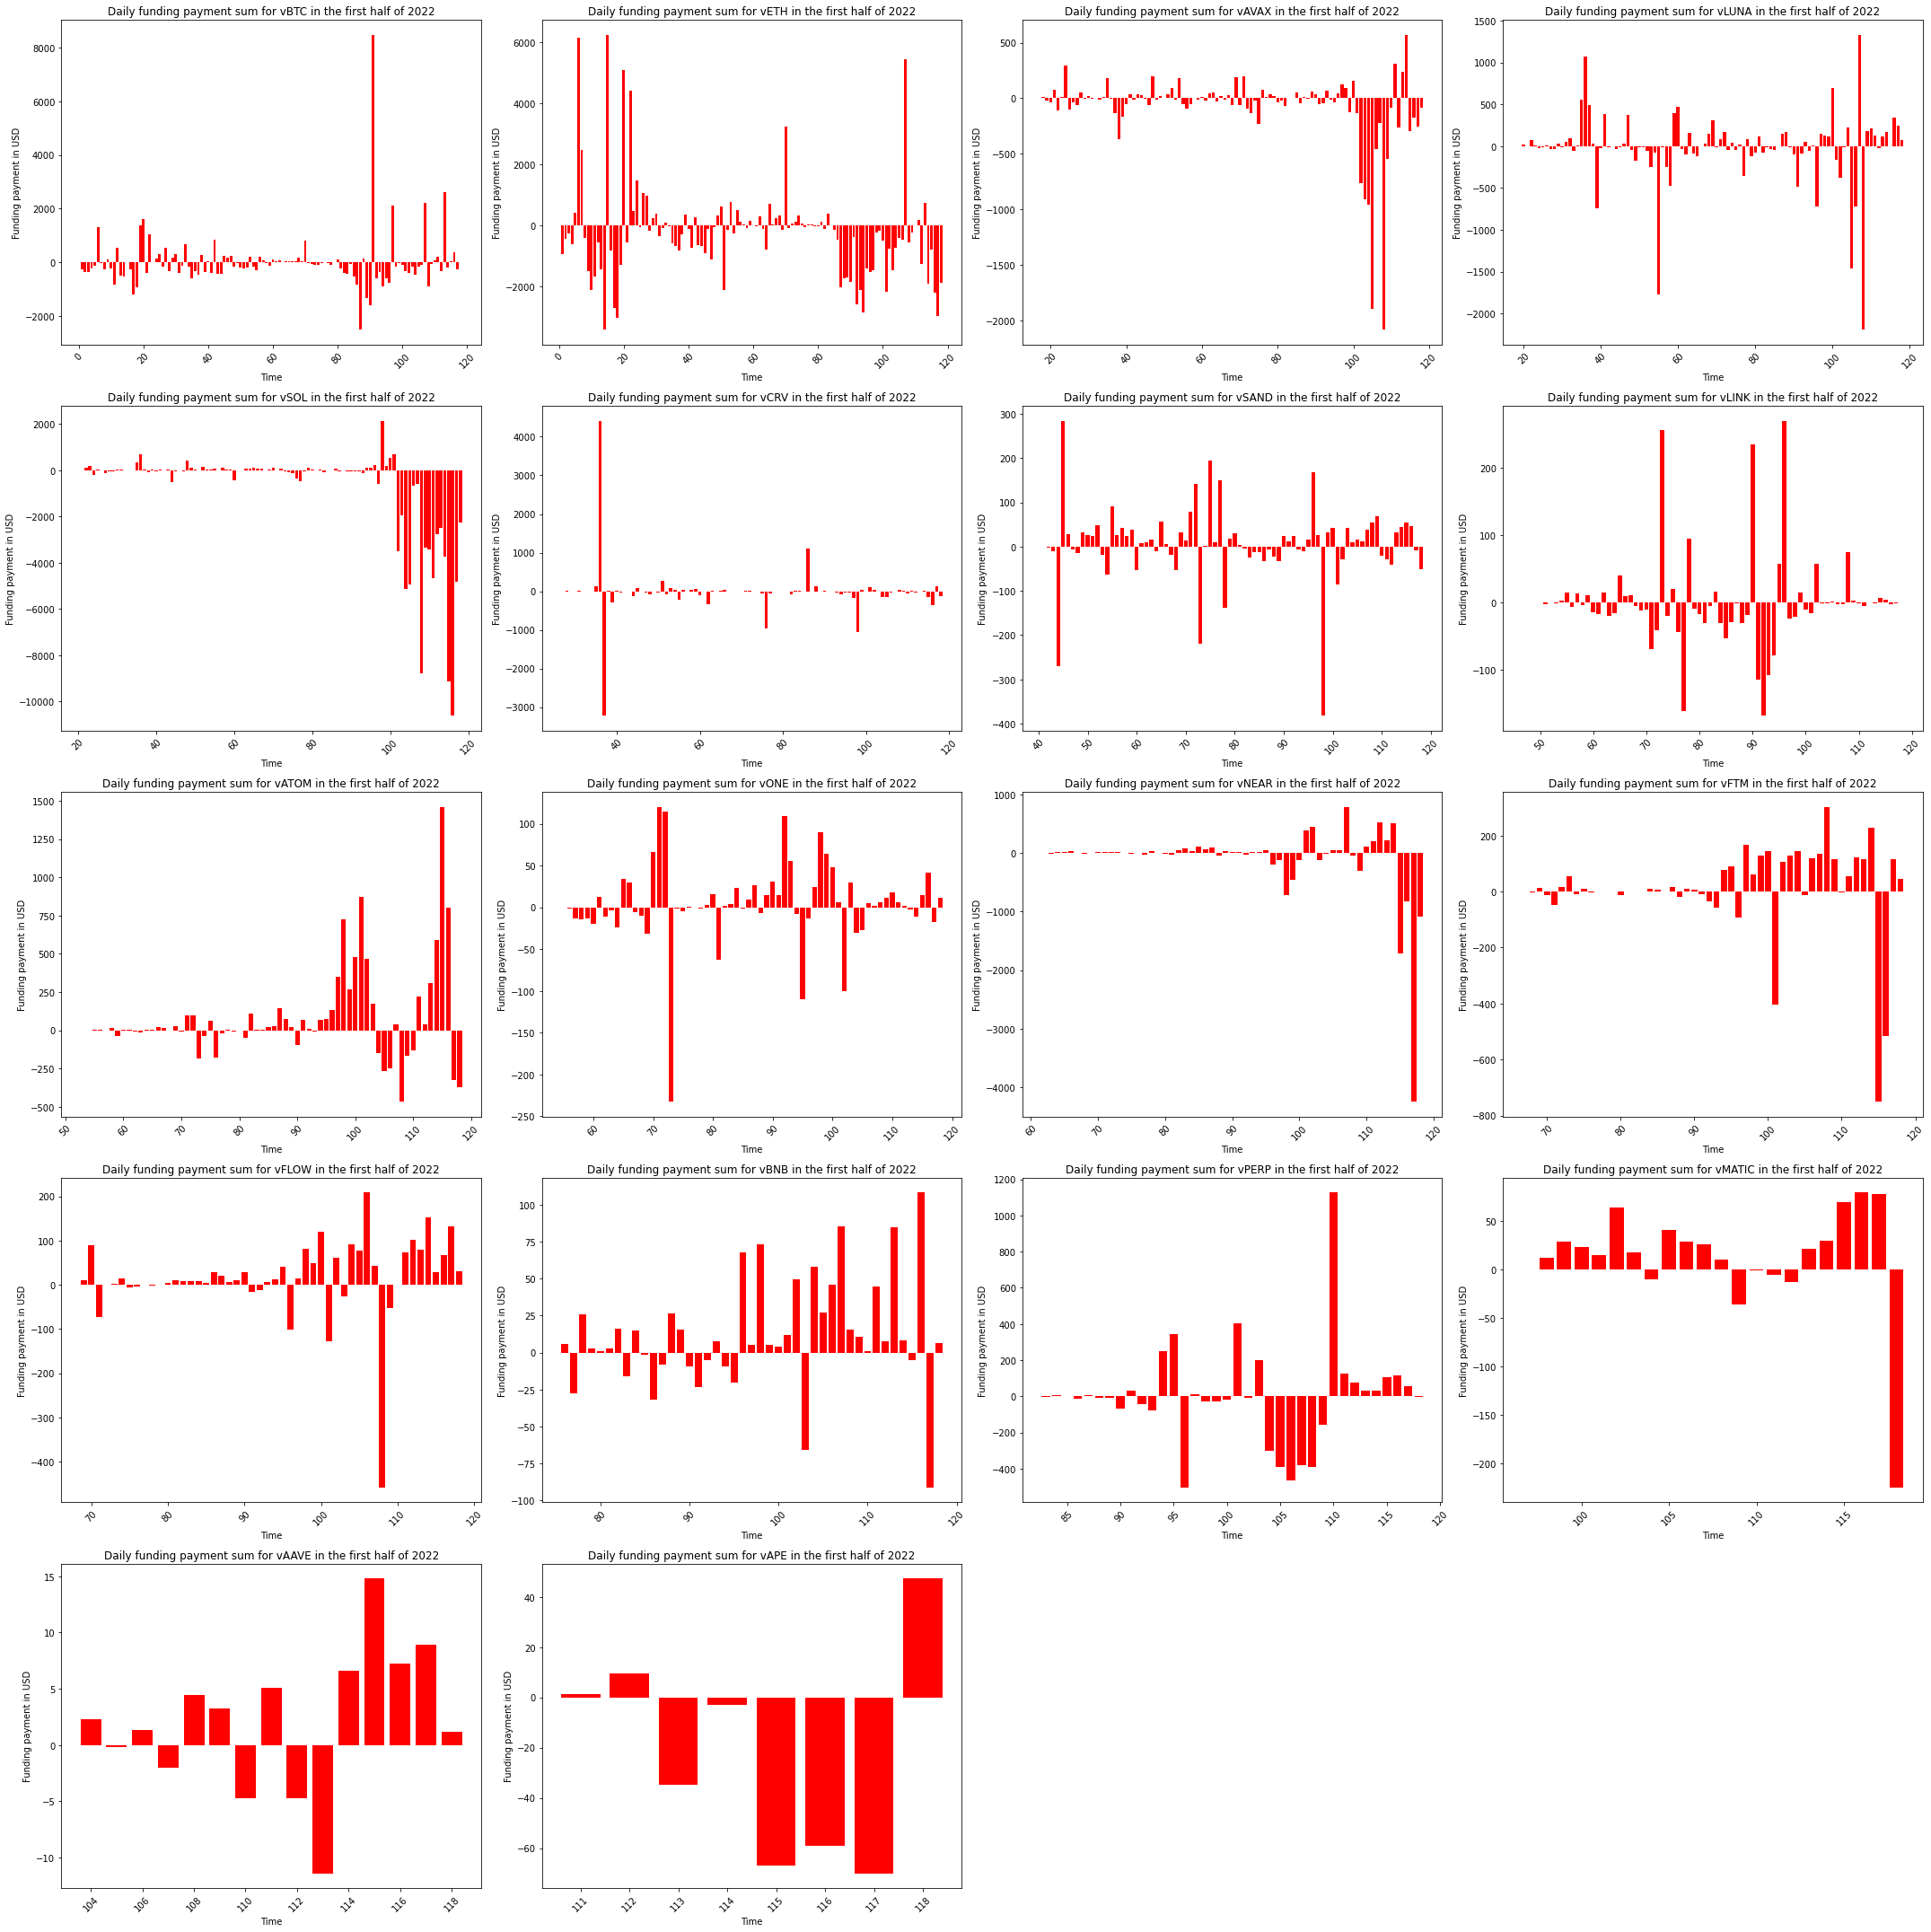

In [17]:
fig = plt.figure(figsize=(30, 30))
index = 1

for pool in funding_payments_df["pool_name"].unique():
    pool_funding_payments_df = funding_payments_df[funding_payments_df["pool_name"] == pool]
    daily_pool_funding_payments_df = pool_funding_payments_df[["day_of_year", "funding_payment"
                                                               ]].groupby("day_of_year").sum()
    
    ax = fig.add_subplot(5, 4, index)
    ax.bar(daily_pool_funding_payments_df[daily_pool_funding_payments_df.index < 200].index, 
            daily_pool_funding_payments_df[daily_pool_funding_payments_df.index < 200]["funding_payment"],
            color='r')
    ax.set_xlabel("Time")
    ax.set_ylabel("Funding payment in USD")
    ax.set_title("Daily funding payment sum for " + pool + " in the first half of 2022")
    plt.xticks(rotation=45)
    index += 1
    
plt.tight_layout()
plt.show()

# Funding rate over time

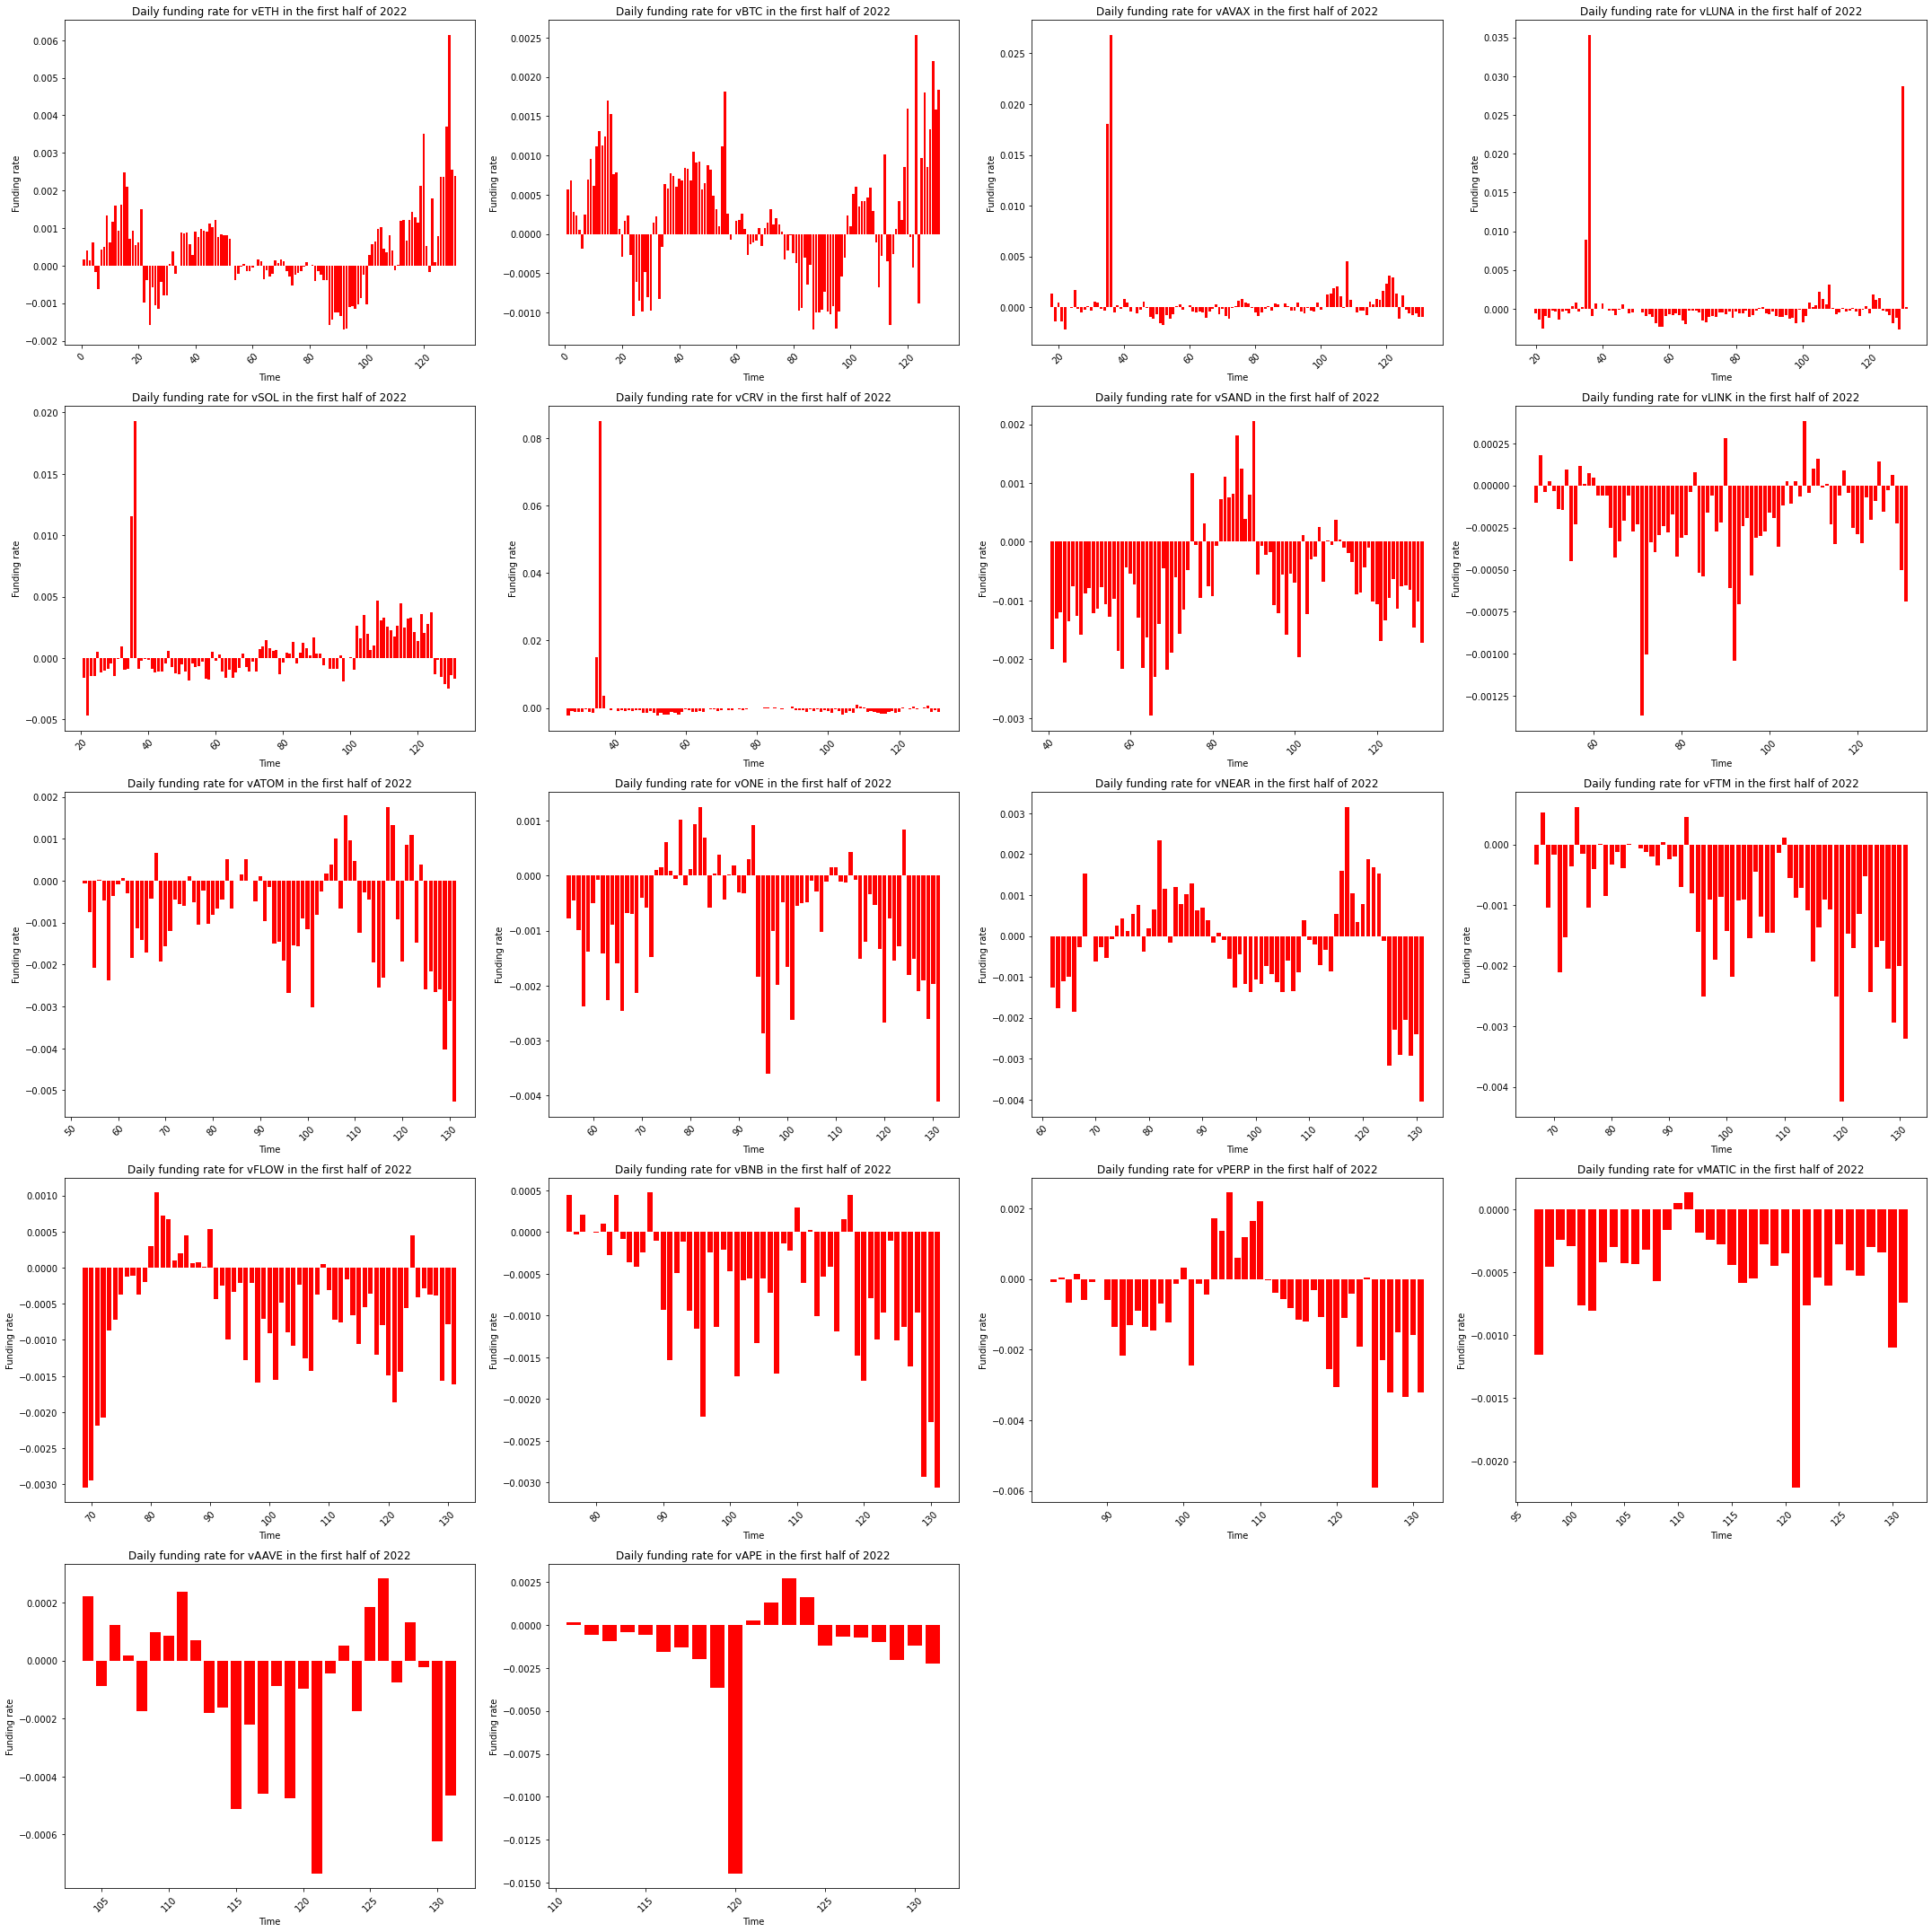

In [28]:
fig = plt.figure(figsize=(30, 30))
index = 1

for pool in funding_updates_df["pool_name"].unique():
    pool_funding_updates_df = funding_updates_df[funding_updates_df["pool_name"] == pool]
    daily_pool_funding_updates_df = pool_funding_updates_df[["day_of_year", "daily_funding_rate"
                                                               ]].groupby("day_of_year").mean()
    
    ax = fig.add_subplot(5, 4, index)
    ax.bar(daily_pool_funding_updates_df[daily_pool_funding_updates_df.index < 200].index, 
            daily_pool_funding_updates_df[daily_pool_funding_updates_df.index < 200]["daily_funding_rate"],
            color='r')
    ax.set_xlabel("Time")
    ax.set_ylabel("Funding rate")
    ax.set_title("Daily funding rate for " + pool + " in the first half of 2022")
    plt.xticks(rotation=45)
    index += 1
    
plt.tight_layout()
plt.show()

In [21]:
funding_updates_df

,id,tx_hash,mark_twap,index_twap,daily_funding_rate,block_number_log_index,block_number,base_token,timestamp,time,pool_name,day_of_year
0,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,4104.856899,4167.914502,-0.015129,515554000,515554,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,1638000985,2021-11-27 08:16:25,vETH,331
1,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,54295.708000,55072.675000,-0.014108,515552000,515552,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,1638000985,2021-11-27 08:16:25,vBTC,331
2,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,4104.856899,4167.914502,-0.015129,515571000,515571,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,1638001140,2021-11-27 08:19:00,vETH,331
3,0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...,0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...,54295.708000,55072.675000,-0.014108,515560000,515560,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,1638001140,2021-11-27 08:19:00,vBTC,331
4,0x4d8968cdbf0802526b673fa96d973dda0361ed6ccccb...,0x4d8968cdbf0802526b673fa96d973dda0361ed6ccccb...,4120.722610,4167.914502,-0.011323,515621000,515621,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,1638001245,2021-11-27 08:20:45,vETH,331
...,...,...,...,...,...,...,...,...,...,...,...,...
1223850,0xaa3b6a9455e2f7e89958f5a966a1ef9510d3cfe2fab7...,0xaa3b6a9455e2f7e89958f5a966a1ef9510d3cfe2fab7...,99.790187,99.833552,-0.000434,7761851000,7761851,0x34235c8489b06482a99bb7fcab6d7c467b92d248,1652254262,2022-05-11 07:31:02,vAAVE,131
1223851,0xb84986d7cfab618c0c633a3882f941eee1ab57908981...,0xb84986d7cfab618c0c633a3882f941eee1ab57908981...,3.567754,3.573108,-0.001498,7761847000,7761847,0x7eada83e15acd08d22ad85a1dce92e5a257acb92,1652254262,2022-05-11 07:31:02,vFLOW,131
1223852,0xced48f250a2076cf66195e9e767f5a2c404de8665c7b...,0xced48f250a2076cf66195e9e767f5a2c404de8665c7b...,1.698208,1.700492,-0.001343,7761850000,7761850,0x9482aafdced6b899626f465e1fa0cf1b1418d797,1652254262,2022-05-11 07:31:02,vPERP,131
1223853,0xd8dcf86bc2bb8e1f3c297427dd034811161bb5026c1e...,0xd8dcf86bc2bb8e1f3c297427dd034811161bb5026c1e...,30692.801260,30632.033550,0.001984,7761848000,7761848,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,1652254262,2022-05-11 07:31:02,vBTC,131


# Index and mark TWAPs over time

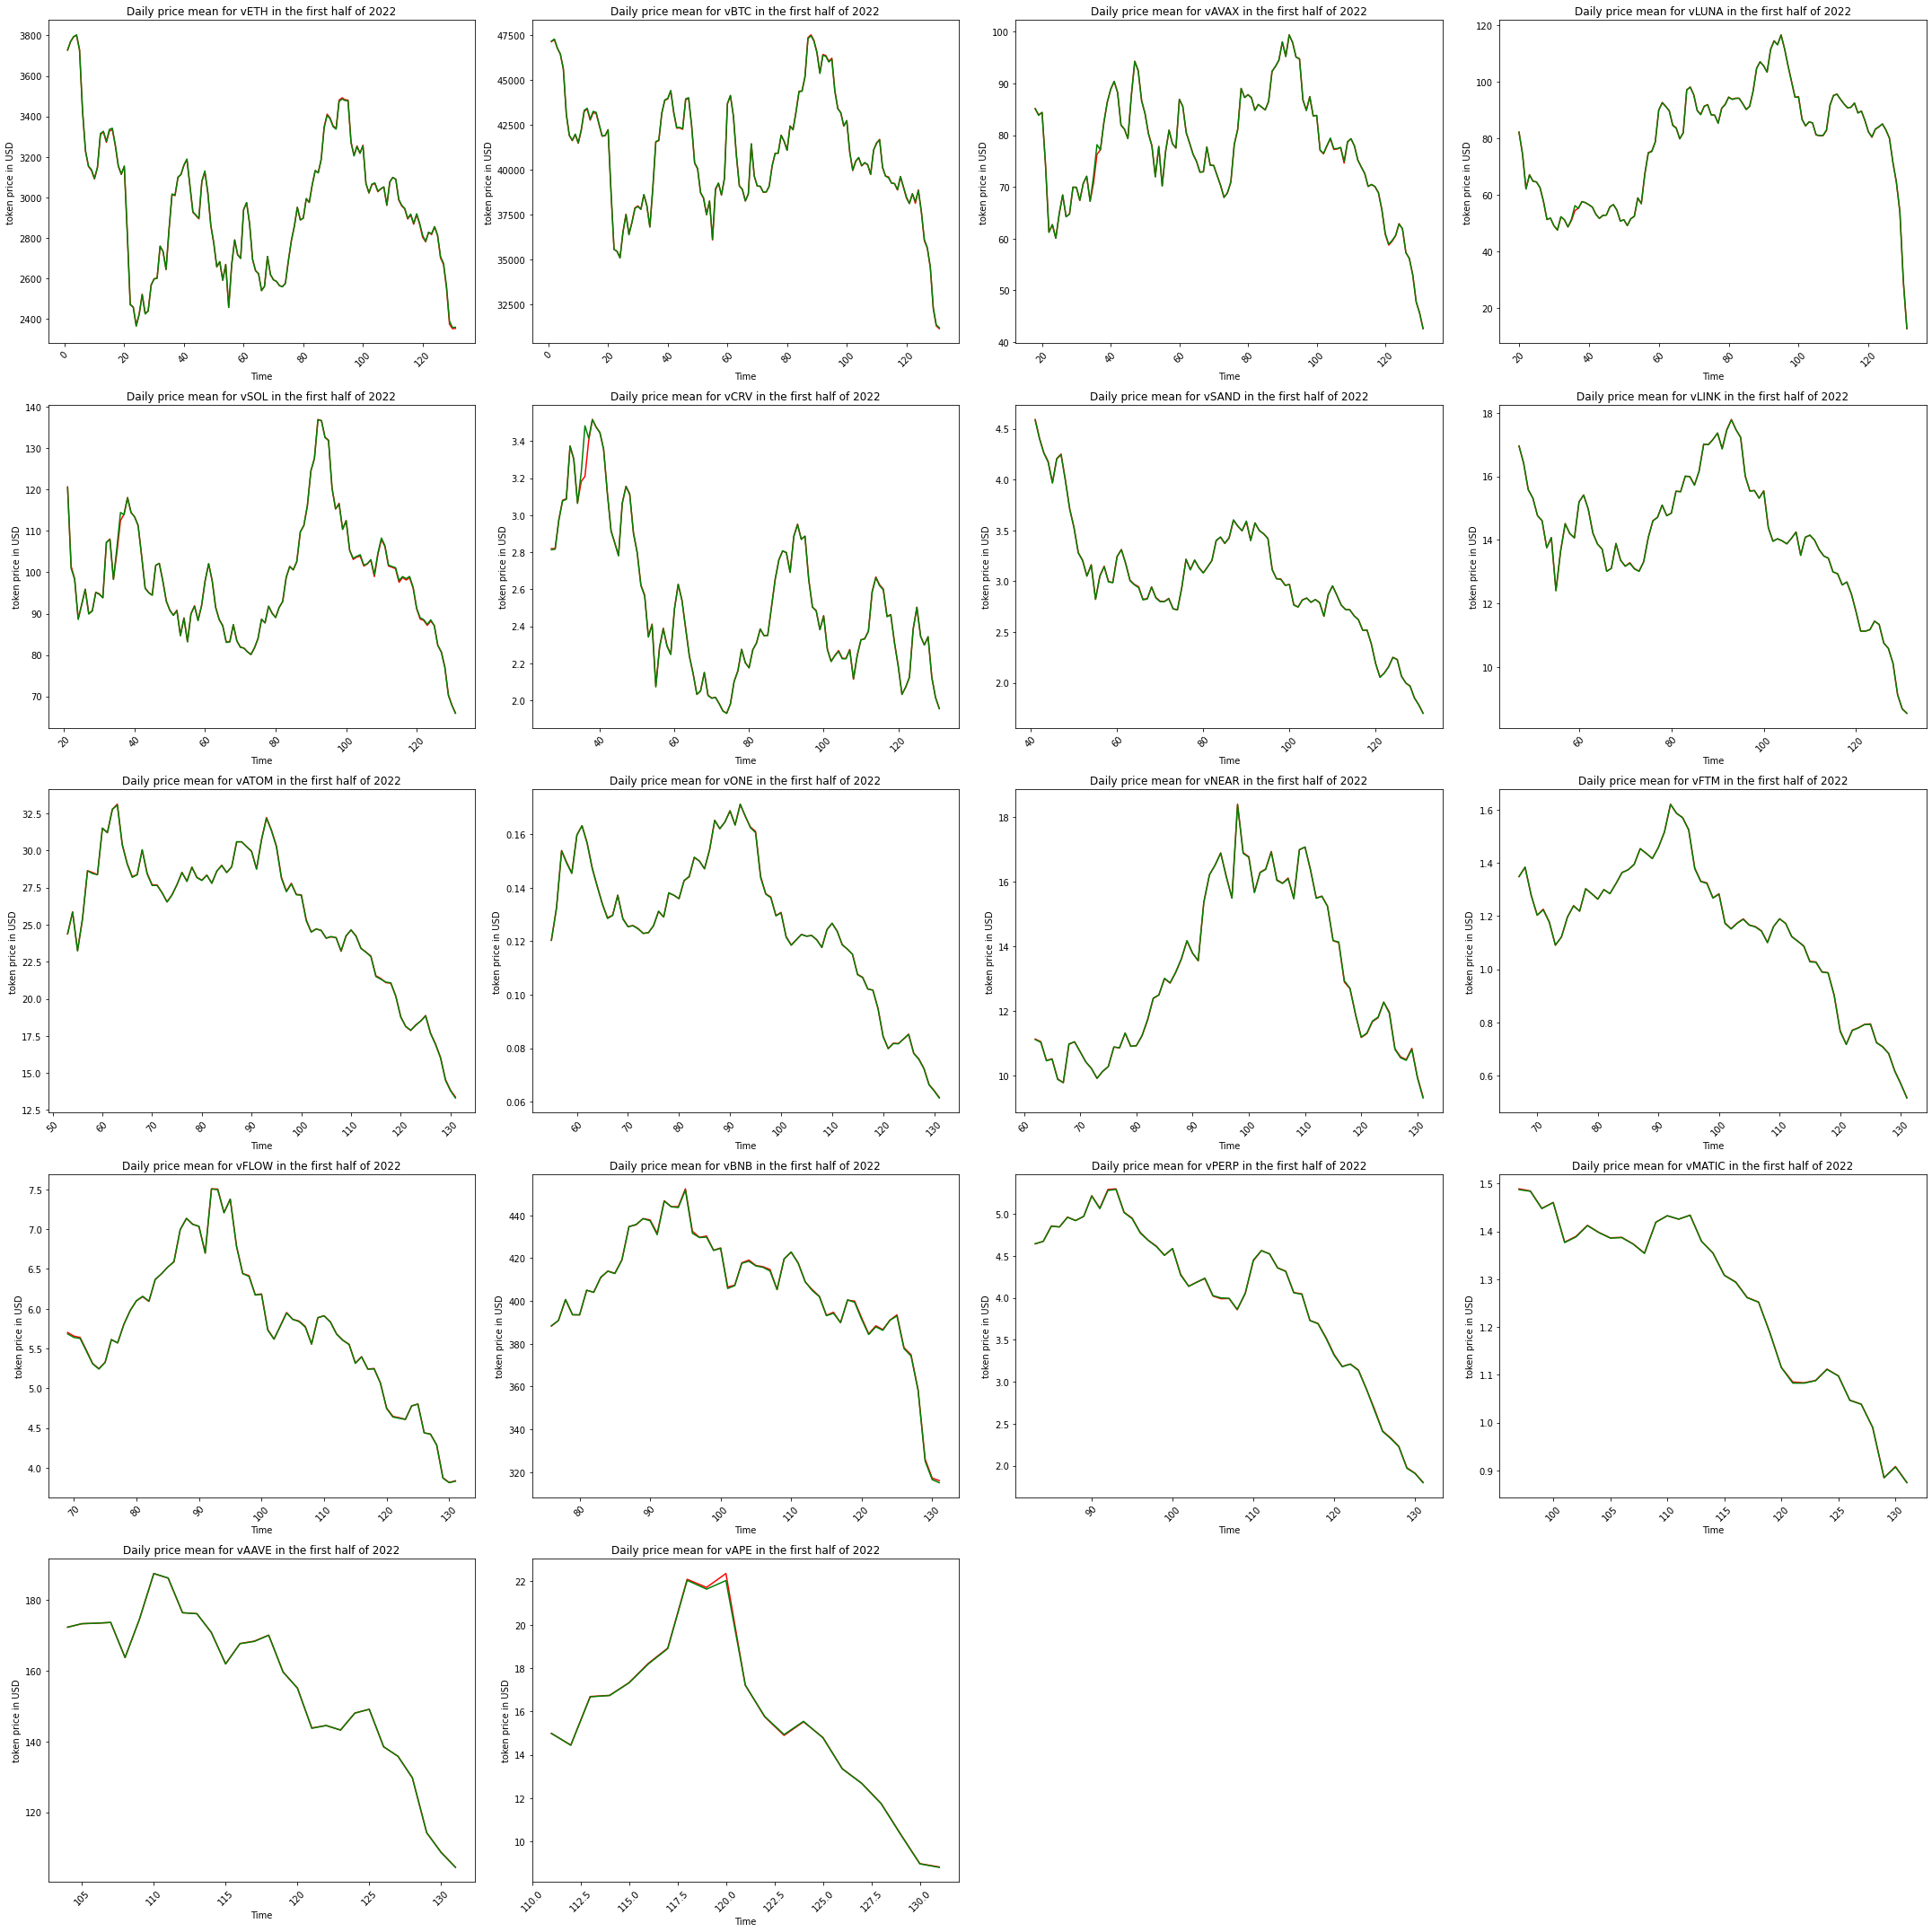

In [20]:
fig = plt.figure(figsize=(30, 30))
index = 1

for pool in funding_updates_df["pool_name"].unique():
    pool_funding_updates_df = funding_updates_df[funding_updates_df["pool_name"] == pool]
    daily_pool_funding_updates_df = pool_funding_updates_df[["day_of_year", "index_twap", "mark_twap"
                                                               ]].groupby("day_of_year").mean()
    
    ax = fig.add_subplot(5, 4, index)
    ax.plot(daily_pool_funding_updates_df[daily_pool_funding_updates_df.index < 200].index, 
            daily_pool_funding_updates_df[daily_pool_funding_updates_df.index < 200]["index_twap"],
            color='r', label="daily mean index TWAP")
    ax.plot(daily_pool_funding_updates_df[daily_pool_funding_updates_df.index < 200].index, 
            daily_pool_funding_updates_df[daily_pool_funding_updates_df.index < 200]["mark_twap"],
            color='g', label="daily mean mark TWAP")
    ax.set_xlabel("Time")
    ax.set_ylabel("token price in USD")
    ax.set_title("Daily price mean for " + pool + " in the first half of 2022")
    plt.xticks(rotation=45)
    index += 1
    
plt.tight_layout()
plt.show()

# Difference between index and mark TWAPs over time

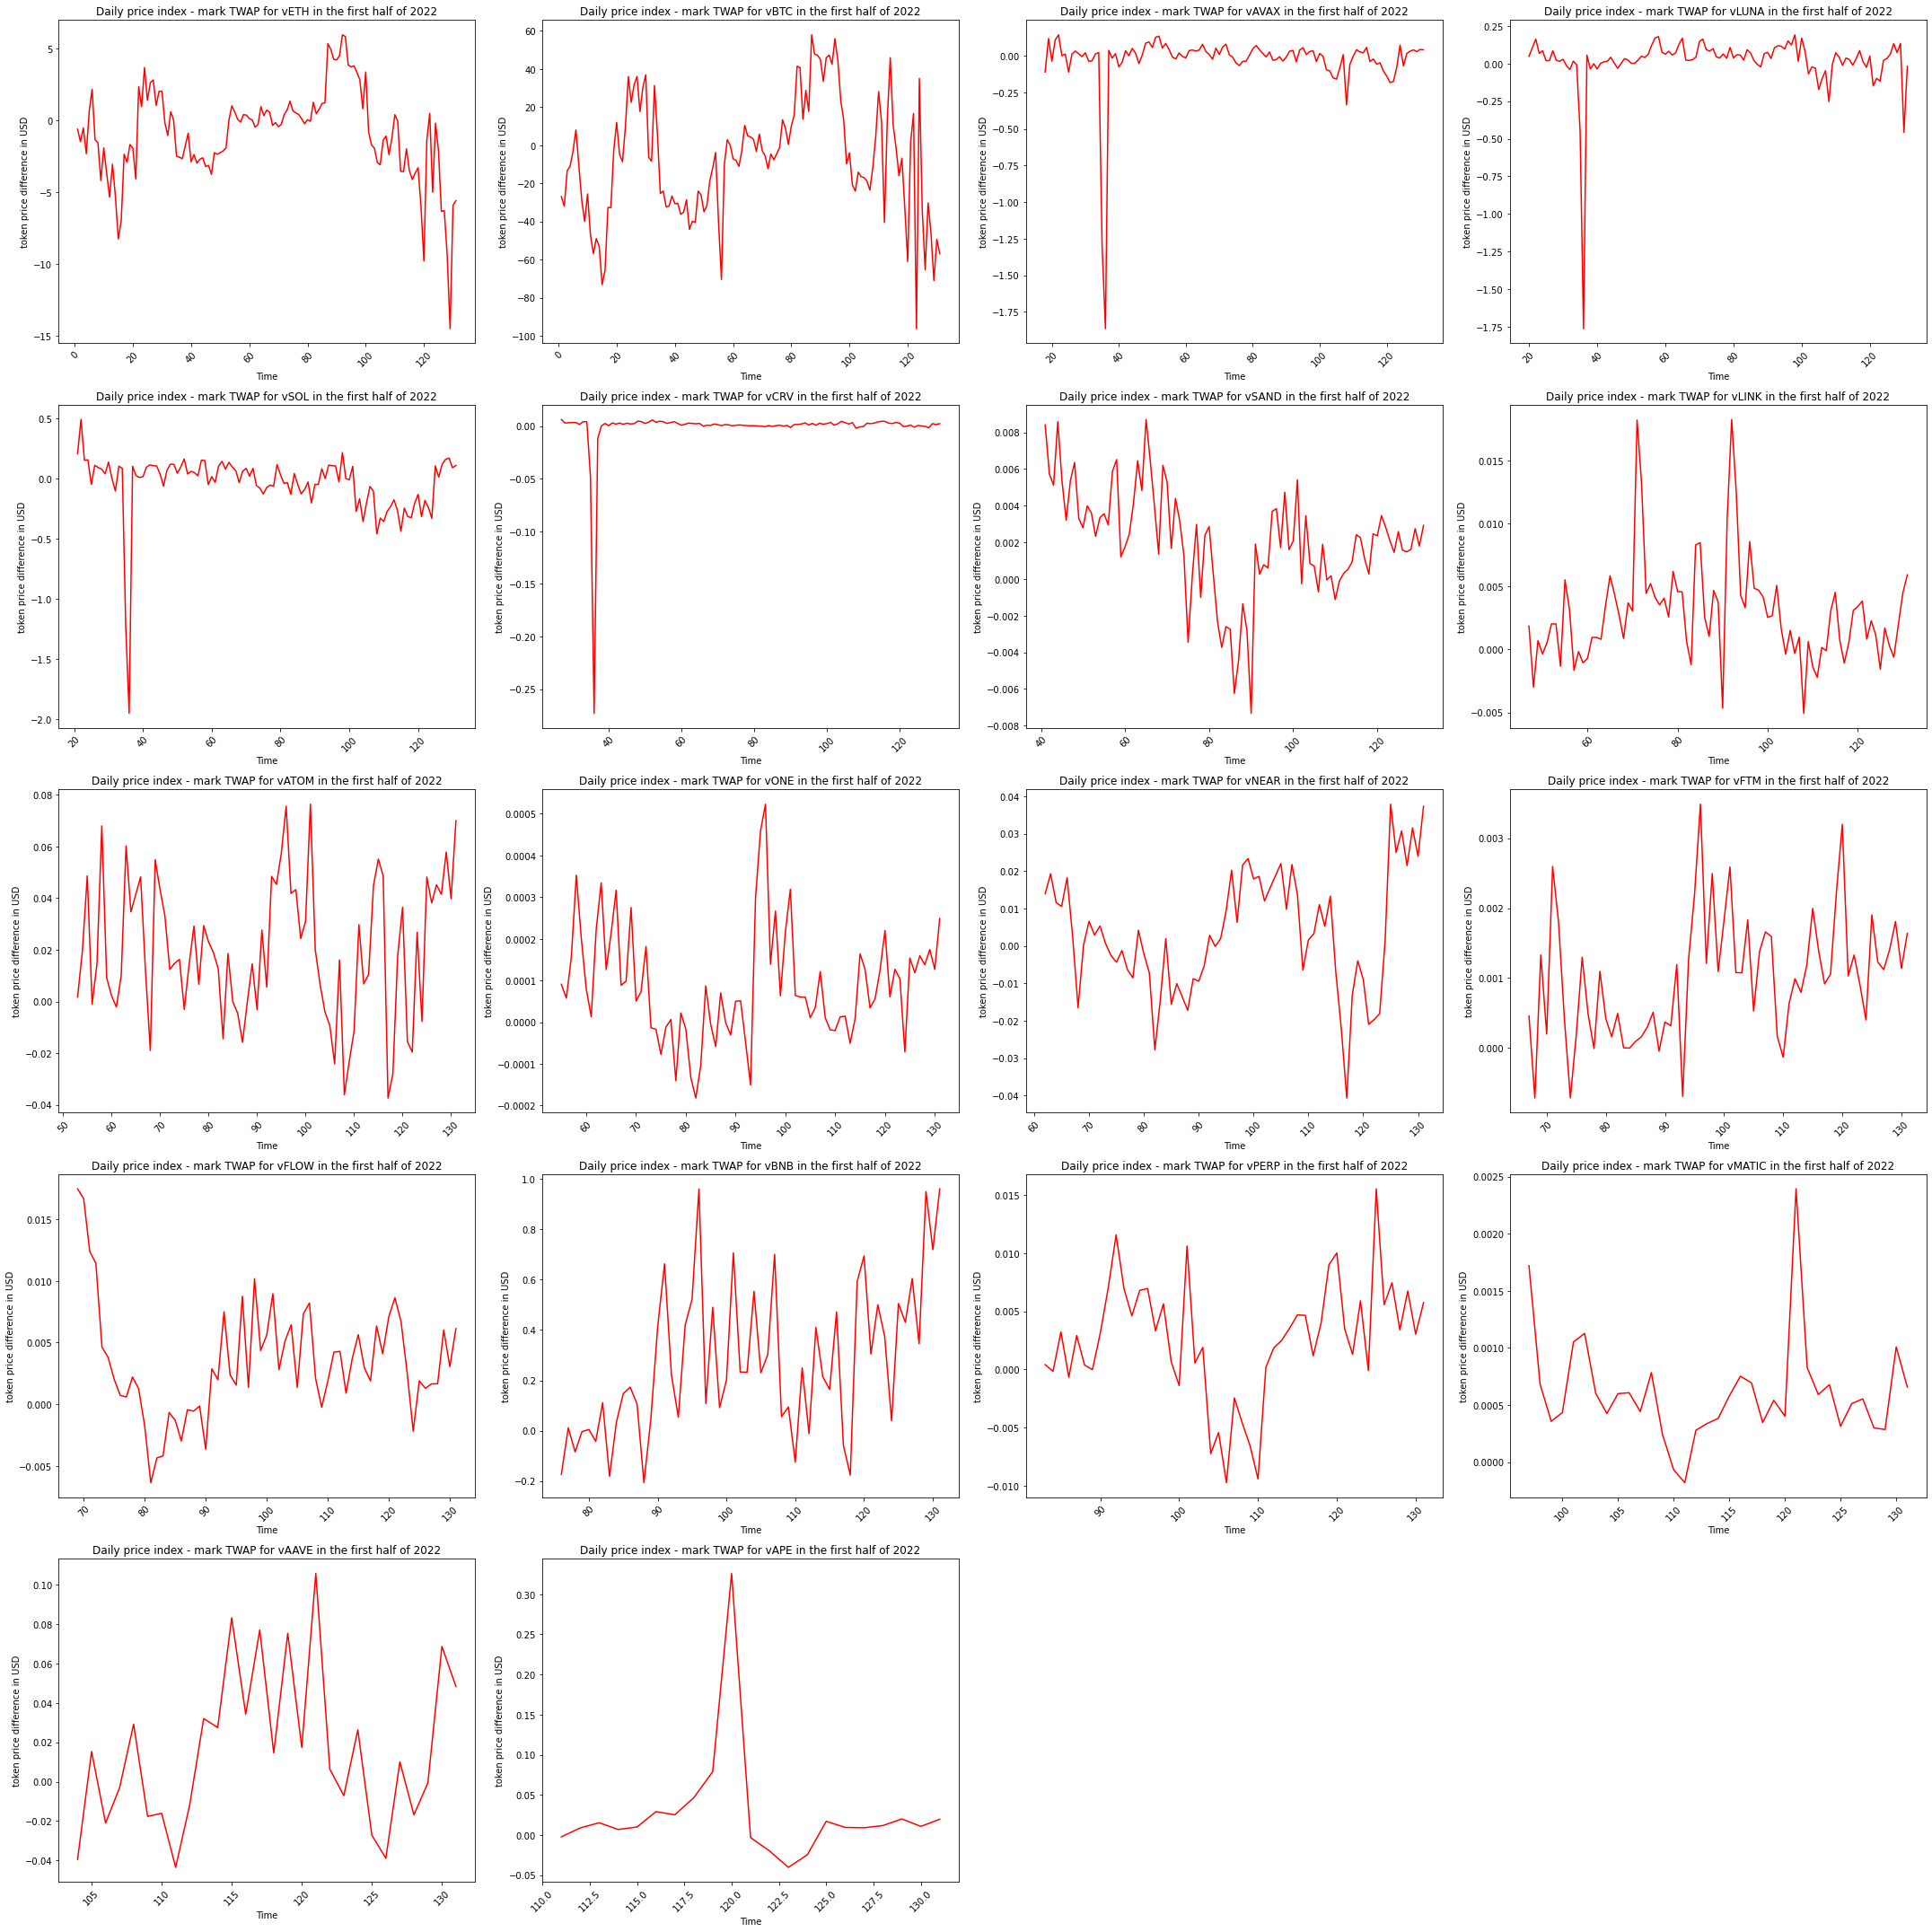

In [23]:
fig = plt.figure(figsize=(30, 30))
index = 1

for pool in funding_updates_df["pool_name"].unique():
    pool_funding_updates_df = funding_updates_df[funding_updates_df["pool_name"] == pool]
    daily_pool_funding_updates_df = pool_funding_updates_df[["day_of_year", "index_twap", "mark_twap"
                                                               ]].groupby("day_of_year").mean()
    
    ax = fig.add_subplot(5, 4, index)
    ax.plot(daily_pool_funding_updates_df[daily_pool_funding_updates_df.index < 200].index, 
            (daily_pool_funding_updates_df[daily_pool_funding_updates_df.index < 200]["index_twap"] - 
             daily_pool_funding_updates_df[daily_pool_funding_updates_df.index < 200]["mark_twap"]),
            color='r', label="index - mark TWAP")
    ax.set_xlabel("Time")
    ax.set_ylabel("token price difference in USD")
    ax.set_title("Daily price index - mark TWAP for " + pool + " in the first half of 2022")
    plt.xticks(rotation=45)
    index += 1
    
plt.tight_layout()
plt.show()